# EDA（Exploratory Data Analysis）：

是指对已有的数据（特别是调查或观察得来的原始数据）在尽量少的先验假定下进行探索，通过作图、制表、方程拟合、计算特征量等手段探索数据的结构和规律的一种数据分析方法。
目标在于熟悉数据集、了解数据集，以及进一步了解变量间的相互关系、变量与预测值之间的存在关系，使得接下来的工作预测的更准确。

### 1) 对于数据的初步分析（.shape, .head(), .sum(), .mean(), .descirbe()等统计函数）
可以从：样本数量，训练集数量，是否有时间特征，是否是时许问题，特征所表示的含义（非匿名特征), 
特征类型（字符类似，int，float，time），特征的缺失情况（注意缺失的在数据中的表现形式，有些是空的有些是”NAN”符号等),
特征的均值方差情况。

### 2) 分析记录某些特征值缺失占比30%以上样本的缺失处理，有助于后续的模型验证和调节，
### 3) 分析特征应该是填充（均值填充、零填充、众数填充等)，还是舍去还是先做样本分类用不同的特征模型去预测。

### 4) 对于异常值做专门的分析，分析特征异常的label是否为异常值（或者偏离均值较远或者事特殊符号)
异常值是否应该剔除，还是用正常值填充，是记录异常，还是机器本身异常等。

### 5) 对于Label做专门的分析，分析标签的分布情况等。

### 6) 进步分析可以通过对特征作图，特征和label联合做图（统计图，离散图)
直观了解特征的分布情况，通过这一步也可以发现数据之中的一些异常值等，通过箱型图分析一些特征值的偏离情况，对于特征和特征联合作图，对于特征和label联合作图，分析其中的一些关联性。

## 1. 载入数据

In [115]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

In [116]:
train = pd.read_csv('./source_data/train.csv' )
test = pd.read_csv('./source_data/testA.csv')

In [117]:
# 显示所有列，显示所有行
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

## 2. 数据总览

In [3]:
train.shape + test.shape

(800000, 47, 200000, 48)

In [4]:
train.head().append(train.tail())

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0
799995,799995,25000.0,3,14.49,860.41,C,C4,2659.0,7 years,1,...,6.0,2.0,12.0,13.0,10.0,14.0,0.0,0.0,0.0,3.0
799996,799996,17000.0,3,7.90,531.94,A,A4,29205.0,10+ years,0,...,15.0,16.0,2.0,19.0,2.0,7.0,0.0,0.0,0.0,0.0
799997,799997,6000.0,3,13.33,203.12,C,C3,2582.0,10+ years,1,...,4.0,26.0,4.0,10.0,4.0,5.0,0.0,0.0,1.0,4.0
799998,799998,19200.0,3,6.92,592.14,A,A4,151.0,10+ years,0,...,10.0,6.0,12.0,22.0,8.0,16.0,0.0,0.0,0.0,5.0
799999,799999,9000.0,3,11.06,294.91,B,B3,13.0,5 years,0,...,3.0,4.0,4.0,8.0,3.0,7.0,0.0,0.0,0.0,2.0


In [5]:
test.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,800000,14000.0,3,10.99,458.28,B,B3,7027.0,10+ years,0,...,8.0,4.0,15.0,19.0,6.0,17.0,0.0,0.0,1.0,3.0
1,800001,20000.0,5,14.65,472.14,C,C5,60426.0,10+ years,0,...,1.0,3.0,3.0,9.0,3.0,5.0,0.0,0.0,2.0,2.0
2,800002,12000.0,3,19.99,445.91,D,D4,23547.0,2 years,1,...,1.0,36.0,5.0,6.0,4.0,12.0,0.0,0.0,0.0,7.0
3,800003,17500.0,5,14.31,410.02,C,C4,636.0,4 years,0,...,7.0,2.0,8.0,14.0,2.0,10.0,0.0,0.0,0.0,3.0
4,800004,35000.0,3,17.09,1249.42,D,D1,368446.0,< 1 year,1,...,11.0,3.0,16.0,18.0,11.0,19.0,0.0,0.0,0.0,1.0


In [6]:
train.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n2.1', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')

In [7]:
test.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'purpose',
       'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow',
       'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal',
       'revolUtil', 'totalAcc', 'initialListStatus', 'applicationType',
       'earliesCreditLine', 'title', 'policyCode', 'n0', 'n1', 'n2', 'n2.1',
       'n2.2', 'n2.3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12',
       'n13', 'n14'],
      dtype='object')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

In [11]:
train.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,...,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,...,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252015,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,...,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,...,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,...,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,...,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,...,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 48 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  200000 non-null  int64  
 1   loanAmnt            200000 non-null  float64
 2   term                200000 non-null  int64  
 3   interestRate        200000 non-null  float64
 4   installment         200000 non-null  float64
 5   grade               200000 non-null  object 
 6   subGrade            200000 non-null  object 
 7   employmentTitle     200000 non-null  float64
 8   employmentLength    188258 non-null  object 
 9   homeOwnership       200000 non-null  int64  
 10  annualIncome        200000 non-null  float64
 11  verificationStatus  200000 non-null  int64  
 12  issueDate           200000 non-null  object 
 13  purpose             200000 non-null  int64  
 14  postCode            200000 non-null  float64
 15  regionCode          200000 non-nul

In [13]:
test.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,purpose,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,...,189889.000000,189889.000000,189889.000000,189889.000000,189889.000000,191606.000000,182425.000000,189889.000000,189889.000000,189889.000000
mean,899999.500000,14436.954125,3.481690,13.244800,438.737804,72435.750740,0.614100,7.645184e+04,1.010430,1.744410,...,8.093976,8.527334,8.274840,14.592551,5.596296,11.626891,0.000833,0.003618,0.088341,2.180316
std,57735.171256,8737.430326,0.855195,4.766528,262.246698,106892.374933,0.675465,7.766237e+04,0.781732,2.367497,...,4.803759,7.303106,4.550902,8.109357,3.220978,5.464619,0.030516,0.064276,0.505161,1.841987
min,800000.000000,500.000000,3.000000,5.310000,14.010000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,849999.750000,8000.000000,3.000000,9.750000,248.890000,420.000000,0.000000,4.600000e+04,0.000000,0.000000,...,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,899999.500000,12000.000000,3.000000,12.740000,375.430000,7836.000000,1.000000,6.500000e+04,1.000000,0.000000,...,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,949999.250000,20000.000000,3.000000,15.990000,580.942500,119739.250000,1.000000,9.000000e+04,2.000000,4.000000,...,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,999999.000000,40000.000000,5.000000,30.990000,1715.420000,378338.000000,5.000000,9.500000e+06,2.000000,13.000000,...,70.000000,99.000000,83.000000,112.000000,41.000000,90.000000,3.000000,3.000000,25.000000,28.000000


## 3. 数据缺失
纵向了解哪些列存在 “nan”, 并可以把nan的个数打印，主要的目的在于查看某一列nan存在的个数是否真的很大，如果nan存在的过多，说明这一列对label的影响几乎不起作用了，可以考虑删掉。如果缺失值很小一般可以选择填充。

### 3.1 训练集上缺失情况

In [14]:
# 训练集数据缺失
train.isnull().sum()

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           1
employmentLength      46799
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
isDefault                 0
purpose                   0
postCode                  1
regionCode                0
dti                     239
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      405
revolBal                  0
revolUtil               531
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     1
policyCode                0
n0                    40270
n1                    40270
n2                    40270
n2.1                

In [92]:
# 从结果上看到这几个特征的缺失比例都不高，后续考虑填充
train.isnull().sum() / len(train)

id                    0.000000
loanAmnt              0.000000
term                  0.000000
interestRate          0.000000
installment           0.000000
grade                 0.000000
subGrade              0.000000
employmentTitle       0.000001
employmentLength      0.000000
homeOwnership         0.000000
annualIncome          0.000000
verificationStatus    0.000000
issueDate             0.000000
isDefault             0.000000
purpose               0.000000
postCode              0.000001
regionCode            0.000000
dti                   0.000299
delinquency_2years    0.000000
ficoRangeLow          0.000000
ficoRangeHigh         0.000000
openAcc               0.000000
pubRec                0.000000
pubRecBankruptcies    0.000506
revolBal              0.000000
revolUtil             0.000664
totalAcc              0.000000
initialListStatus     0.000000
applicationType       0.000000
earliesCreditLine     0.000000
title                 0.000001
policyCode            0.000000
n0      

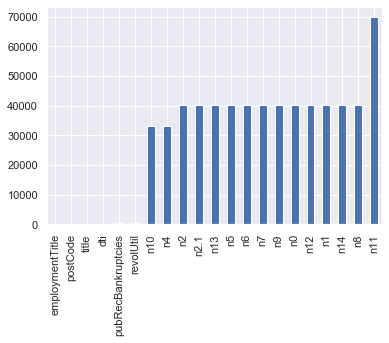

In [63]:
# 缺失值可视化
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [64]:
missing

employmentTitle           1
postCode                  1
title                     1
dti                     239
pubRecBankruptcies      405
revolUtil               531
n10                   33239
n4                    33239
n2                    40270
n2.1                  40270
n13                   40270
n5                    40270
n6                    40270
n7                    40270
n9                    40270
n0                    40270
n12                   40270
n1                    40270
n14                   40270
n8                    40271
n11                   69752
dtype: int64

In [67]:
train.loc[train['employmentTitle'].isnull()]

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n2.1,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
229130,229130,23800.0,5,14.49,559.85,C,C4,NaN,10+ years,0,119000.0,0,2016-10-01,0,0,29.0,19,32.73,0.0,685.0,689.0,13.0,0.0,0.0,107747.0,89.5,29.0,1,0,Aug-1992,0.0,1.0,0.0,5.0,6.0,6.0,5.0,10.0,10.0,8.0,14.0,6.0,13.0,0.0,0.0,0.0,3.0


In [68]:
train.loc[train['employmentTitle'].isnull()]

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n2.1,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
229130,229130,23800.0,5,14.49,559.85,C,C4,NaN,10+ years,0,119000.0,0,2016-10-01,0,0,29.0,19,32.73,0.0,685.0,689.0,13.0,0.0,0.0,107747.0,89.5,29.0,1,0,Aug-1992,0.0,1.0,0.0,5.0,6.0,6.0,5.0,10.0,10.0,8.0,14.0,6.0,13.0,0.0,0.0,0.0,3.0


In [69]:
train.loc[train['postCode'].isnull()]

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n2.1,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
433793,433793,16000.0,5,15.59,385.62,C,C5,174429.0,5 years,0,86000.0,0,2016-10-01,0,4,NaN,4,11.97,0.0,715.0,719.0,12.0,0.0,0.0,9079.0,31.0,22.0,0,0,Oct-2003,4.0,1.0,0.0,3.0,4.0,4.0,5.0,5.0,9.0,9.0,12.0,4.0,12.0,0.0,0.0,0.0,5.0


In [70]:
train.loc[train['title'].isnull()]

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n2.1,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
531009,531009,18000.0,5,17.58,452.98,D,D4,352575.0,10+ years,0,100000.0,1,2012-01-01,0,0,607.0,14,17.57,0.0,685.0,689.0,13.0,0.0,0.0,19243.0,73.2,41.0,1,0,Feb-1997,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
train.loc[train['dti'].isnull()]

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n2.1,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
5154,5154,18000.0,5,17.99,456.99,D,D2,17486.0,< 1 year,0,0.0,0,2016-10-01,1,0,114.0,13,NaN,0.0,680.0,684.0,6.0,0.0,0.0,2601.0,27.7,41.0,0,1,Dec-2000,0.0,1.0,0.0,1.0,3.0,3.0,1.0,7.0,24.0,4.0,17.0,3.0,6.0,0.0,0.0,0.0,1.0
23758,23758,10000.0,3,15.05,346.90,C,C4,54.0,MISSING,0,0.0,0,2017-10-01,0,0,408.0,14,NaN,0.0,700.0,704.0,24.0,0.0,0.0,9348.0,23.8,39.0,1,1,May-2006,0.0,1.0,0.0,2.0,6.0,6.0,4.0,4.0,13.0,22.0,26.0,6.0,24.0,0.0,0.0,0.0,1.0
28769,28769,14000.0,5,14.03,325.98,C,C2,54.0,MISSING,0,0.0,0,2018-06-01,1,0,337.0,14,NaN,0.0,725.0,729.0,5.0,0.0,0.0,3549.0,45.5,10.0,0,1,Jan-2013,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,4.0,3.0,4.0,1.0,5.0,0.0,0.0,0.0,1.0
31099,31099,35000.0,3,10.42,1136.27,B,B3,54.0,MISSING,0,0.0,0,2017-11-01,0,2,158.0,9,NaN,0.0,740.0,744.0,14.0,0.0,0.0,12540.0,16.1,20.0,0,1,Oct-2007,5.0,1.0,0.0,3.0,6.0,6.0,4.0,5.0,7.0,10.0,11.0,6.0,14.0,0.0,0.0,0.0,6.0
32098,32098,10000.0,5,30.17,324.58,F,F3,54.0,MISSING,1,0.0,0,2018-08-01,0,0,0.0,0,NaN,0.0,745.0,749.0,6.0,0.0,0.0,29452.0,77.3,25.0,0,1,Mar-1989,0.0,1.0,0.0,2.0,2.0,2.0,3.0,8.0,8.0,5.0,16.0,2.0,6.0,0.0,0.0,0.0,1.0
47168,47168,11200.0,5,15.05,266.75,C,C4,54.0,MISSING,2,0.0,0,2017-07-01,1,5,779.0,43,NaN,0.0,685.0,689.0,3.0,0.0,0.0,1612.0,59.7,14.0,0,1,Aug-2008,6.0,1.0,0.0,1.0,2.0,2.0,1.0,1.0,12.0,2.0,2.0,2.0,3.0,0.0,0.0,0.0,1.0
52631,52631,2200.0,3,10.91,71.94,B,B4,54.0,MISSING,0,0.0,0,2017-12-01,0,9,132.0,12,NaN,0.0,740.0,744.0,13.0,0.0,0.0,1733.0,11.4,36.0,1,1,Dec-2006,10.0,1.0,0.0,0.0,2.0,2.0,3.0,6.0,10.0,8.0,21.0,2.0,13.0,0.0,0.0,0.0,2.0
53056,53056,8000.0,3,15.05,277.52,C,C4,54.0,MISSING,0,0.0,0,2017-05-01,0,0,538.0,14,NaN,4.0,675.0,679.0,7.0,0.0,0.0,6966.0,56.2,18.0,0,1,Apr-2003,0.0,1.0,0.0,2.0,4.0,4.0,2.0,2.0,7.0,5.0,10.0,4.0,7.0,0.0,0.0,1.0,0.0
58241,58241,20000.0,5,18.45,512.78,D,D2,54.0,MISSING,1,0.0,0,2018-03-01,1,0,157.0,8,NaN,0.0,735.0,739.0,7.0,0.0,0.0,9171.0,61.1,12.0,0,1,Nov-2009,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,7.0,1.0,2.0,1.0,7.0,0.0,0.0,0.0,3.0
63547,63547,28800.0,5,20.89,777.36,D,D4,54.0,MISSING,2,0.0,2,2018-07-01,0,0,539.0,42,NaN,0.0,780.0,784.0,8.0,0.0,0.0,19549.0,48.5,20.0,0,1,Nov-1993,0.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,5.0,6.0,15.0,2.0,8.0,0.0,0.0,0.0,1.0


In [72]:
train.loc[train['pubRecBankruptcies'].isnull()]

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n2.1,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
474,474,9325.0,3,10.91,304.90,C,C3,15890.0,10+ years,1,70522.26,0,2007-12-01,0,0,57.0,9,18.96,1.0,690.0,694.0,9.0,0.0,NaN,5749.0,43.2,23.0,1,0,Jan-1993,20830.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1132,1132,10000.0,3,9.45,320.10,B,B1,218922.0,< 1 year,1,94000.00,0,2008-03-01,0,0,51.0,13,7.44,0.0,725.0,729.0,17.0,0.0,NaN,29884.0,43.6,27.0,1,0,Dec-1998,38.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2047,2047,1500.0,3,8.63,47.45,A,A5,247026.0,2 years,0,17544.00,0,2008-01-01,0,0,116.0,14,9.37,0.0,720.0,724.0,6.0,0.0,NaN,6033.0,31.1,6.0,1,0,Feb-1994,20702.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2413,2413,3000.0,3,9.96,96.75,B,B5,247250.0,1 year,2,18000.00,0,2007-10-01,0,13,74.0,30,15.40,0.0,705.0,709.0,9.0,0.0,NaN,12003.0,40.4,9.0,1,0,Dec-1976,8758.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6347,6347,1200.0,3,8.00,37.61,A,A3,222786.0,5 years,1,14800.00,0,2008-03-01,0,0,51.0,13,2.43,0.0,745.0,749.0,8.0,0.0,NaN,1946.0,6.5,25.0,1,0,Jan-2002,20543.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9822,9822,10000.0,3,8.07,313.67,A,A4,247279.0,< 1 year,0,173000.00,0,2007-09-01,0,8,267.0,27,0.72,0.0,785.0,789.0,14.0,0.0,NaN,3054.0,5.6,41.0,1,0,Sep-1985,899.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10872,10872,25000.0,3,13.75,851.41,E,E2,247153.0,5 years,1,75000.00,0,2008-01-01,1,2,209.0,21,19.78,0.0,685.0,689.0,8.0,0.0,NaN,12308.0,43.6,12.0,1,0,May-2001,8093.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13400,13400,3250.0,3,7.75,101.47,A,A3,247105.0,4 years,2,36000.00,0,2008-01-01,1,0,241.0,7,2.73,0.0,740.0,744.0,5.0,0.0,NaN,2353.0,12.4,7.0,1,0,Jan-2001,20771.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14995,14995,6000.0,3,9.76,192.93,B,B2,247018.0,9 years,0,200000.00,0,2008-02-01,0,8,203.0,30,4.84,0.0,705.0,709.0,11.0,0.0,NaN,21894.0,0.0,22.0,1,0,Apr-1992,20694.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15252,15252,2125.0,3,15.01,73.68,F,F1,54.0,< 1 year,0,96000.00,0,2007-09-01,1,1,91.0,7,16.89,0.0,700.0,704.0,5.0,0.0,NaN,51.0,0.0,9.0,1,0,Jul-1996,18432.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
train.loc[train['revolUtil'].isnull()]

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n2.1,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
3573,3573,16000.0,3,24.99,636.08,F,F3,9416.0,8 years,0,50000.00,1,2016-03-01,1,0,528.0,22,11.83,0.0,720.0,724.0,2.0,0.0,0.0,0.0,NaN,23.0,1,0,May-1997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,15.0,0.0,7.0,0.0,2.0,0.0,0.0,0.0,1.0
4693,4693,2800.0,3,14.49,96.37,C,C4,362601.0,3 years,0,36000.00,2,2016-07-01,0,0,495.0,14,19.20,0.0,685.0,689.0,7.0,0.0,0.0,0.0,NaN,25.0,0,0,Feb-2005,0.0,1.0,4.0,0.0,0.0,0.0,0.0,5.0,19.0,0.0,5.0,0.0,7.0,0.0,0.0,0.0,2.0
9389,9389,8000.0,3,14.49,275.33,C,C4,6747.0,5 years,0,80000.00,1,2016-07-01,0,0,271.0,35,12.71,1.0,665.0,669.0,4.0,0.0,0.0,0.0,NaN,18.0,1,0,Dec-2004,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,8.0,0.0,7.0,0.0,4.0,0.0,0.0,0.0,2.0
11391,11391,5600.0,3,10.64,182.39,B,B4,244822.0,4 years,5,78000.00,0,2008-07-01,0,3,223.0,12,4.26,0.0,695.0,699.0,5.0,1.0,0.0,0.0,NaN,14.0,1,0,Mar-1997,20240.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12266,12266,8000.0,3,18.24,290.19,D,D5,14673.0,10+ years,0,68000.00,2,2014-07-01,0,2,56.0,8,0.26,1.0,665.0,669.0,2.0,0.0,0.0,0.0,NaN,16.0,0,0,Apr-1999,5.0,1.0,4.0,0.0,0.0,0.0,1.0,6.0,5.0,1.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0
14533,14533,8000.0,3,20.39,298.91,D,D4,22710.0,1 year,1,48000.00,1,2018-04-01,1,0,51.0,13,20.85,0.0,695.0,699.0,12.0,0.0,0.0,0.0,NaN,16.0,0,0,May-2010,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,2.0,0.0,12.0,0.0,0.0,0.0,2.0
17336,17336,5000.0,3,15.31,174.08,D,D3,242997.0,2 years,1,55000.00,0,2010-01-01,0,0,74.0,30,9.45,0.0,730.0,734.0,2.0,0.0,0.0,0.0,NaN,4.0,1,0,Oct-2002,16831.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17903,17903,17000.0,3,12.61,569.61,C,C1,490.0,6 years,0,130000.00,0,2018-03-01,0,4,228.0,24,14.37,0.0,685.0,689.0,4.0,0.0,0.0,0.0,NaN,19.0,0,0,Oct-1992,4.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,9.0,0.0,4.0,0.0,0.0,0.0,1.0
18769,18769,35000.0,5,24.85,1024.23,E,E3,17784.0,< 1 year,0,40000.00,2,2017-12-01,1,0,174.0,7,19.17,0.0,735.0,739.0,1.0,0.0,0.0,0.0,NaN,13.0,0,1,Oct-2004,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,8.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0
19320,19320,31000.0,3,17.77,1117.16,D,D1,305112.0,10+ years,0,150000.00,2,2013-04-01,0,0,741.0,13,9.70,1.0,715.0,719.0,2.0,0.0,0.0,0.0,NaN,19.0,1,0,May-1994,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,3.0,0.0,10.0,0.0,2.0,0.0,0.0,0.0,0.0


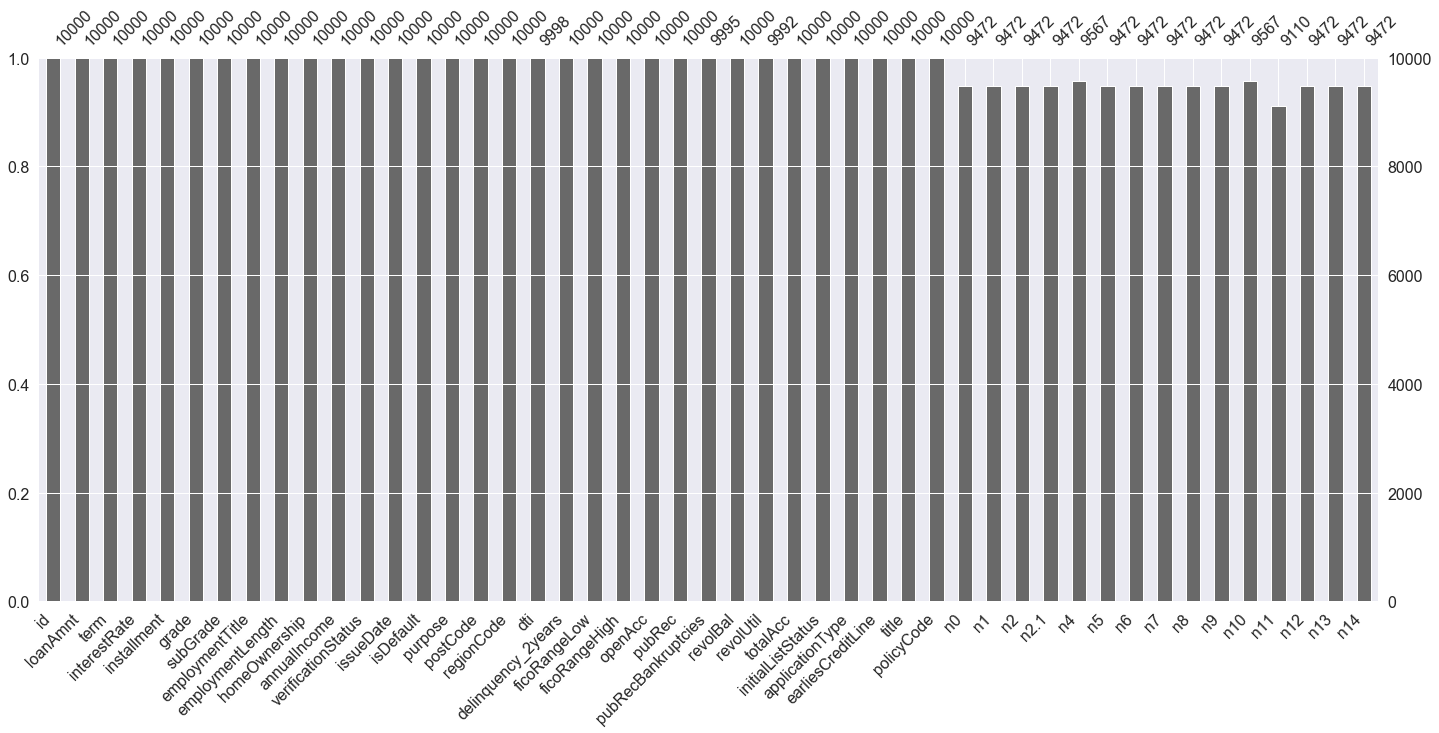

In [75]:
msno.bar(train.sample(10000))

### 3.2 测试集上缺失情况

In [ ]:
# 测试集数据缺失
test.isnull().sum()

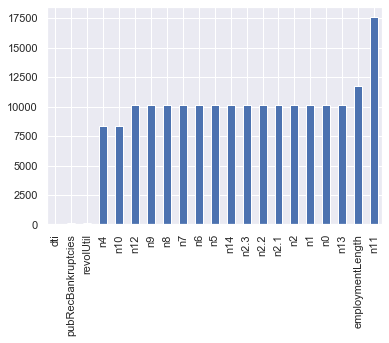

In [74]:
missing_test = test.isnull().sum()
missing_test = missing_test[missing_test > 0]
missing_test.sort_values(inplace=True)
missing_test.plot.bar()

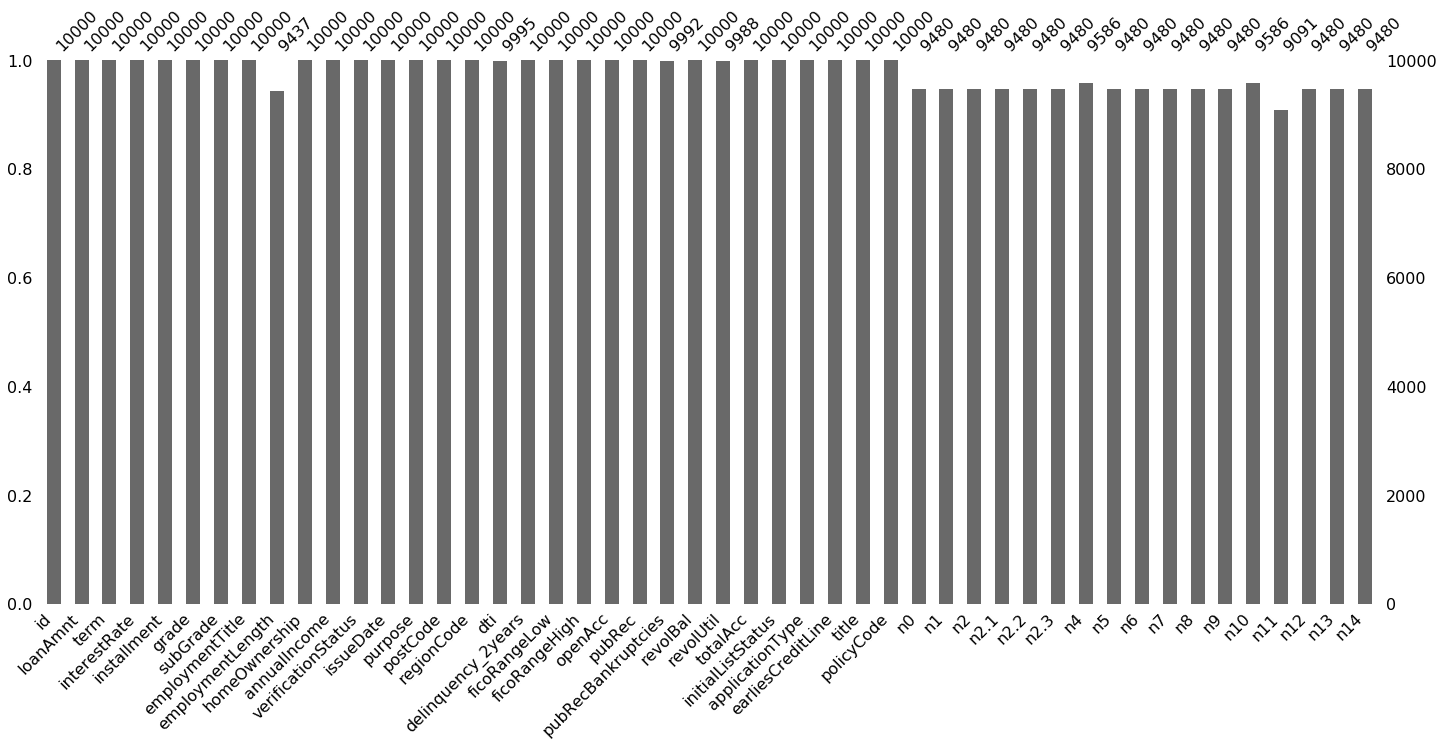

In [20]:
msno.bar(test.sample(10000))

##  3. 目标值的分布

Text(0, 0.5, 'Number of occurrences')

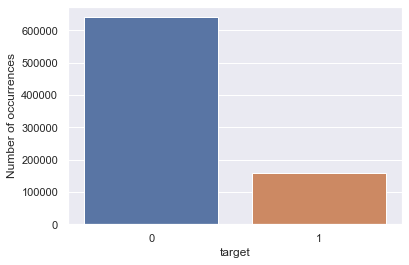

In [113]:
# 从目标值的分布看到，违约的类别是不违约类别的4倍，样本还比较均衡
sns.countplot(train['isDefault'])
plt.xlabel('target')
plt.ylabel('Number of occurrences')

In [112]:
train['isDefault'].value_counts()

0    640390
1    159610
Name: isDefault, dtype: int64

## 4. 数值型特征

In [118]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment',
       'employmentTitle', 'homeOwnership', 'annualIncome',
       'verificationStatus', 'isDefault', 'purpose', 'postCode', 'regionCode',
       'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc',
       'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'title', 'policyCode', 'n0',
       'n1', 'n2', 'n2.1', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11',
       'n12', 'n13', 'n14'],
      dtype='object')

In [119]:
# 划分数值型变量中的连续变量和离散型变量
def get_numerical_serial_fea(data,feas):
    numerical_serial_fea = []
    numerical_noserial_fea = []
    for fea in feas:
        temp = data[fea].nunique()
        if temp <= 10:
            numerical_noserial_fea.append(fea)
            continue
        numerical_serial_fea.append(fea)
    return numerical_serial_fea, numerical_noserial_fea
numerical_serial_fea, numerical_noserial_fea = get_numerical_serial_fea(train, numeric_features)

In [120]:
numerical_serial_fea

['id',
 'loanAmnt',
 'interestRate',
 'installment',
 'employmentTitle',
 'annualIncome',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'title',
 'n0',
 'n1',
 'n2',
 'n2.1',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n13',
 'n14']

### 4.1 训练集上的连续型特征

In [129]:
threshold = 0.5
corr_list = []
size = corr.shape[0]

for i in range(0, size): 
    for j in range(i+1,size): 
        if (corr.iloc[i,j] >= threshold and corr.iloc[i,j] < 1) or (corr.iloc[i,j] < 0 and corr.iloc[i,j] <= -threshold):
            corr_list.append([corr.iloc[i,j],i,j]) 
          
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (numerical_serial_fea[i],numerical_serial_fea[j],v))

ficoRangeLow and ficoRangeHigh = 1.00
openAcc and n10 = 1.00
n2 and n9 = 0.98
n2.1 and n9 = 0.98
loanAmnt and installment = 0.95
n5 and n8 = 0.84
openAcc and n7 = 0.83
n7 and n10 = 0.83
n1 and n4 = 0.83
n1 and n2 = 0.81
n1 and n2.1 = 0.81
n1 and n9 = 0.80
n7 and n9 = 0.79
n2 and n7 = 0.79
n2.1 and n7 = 0.79
n7 and n8 = 0.77
totalAcc and n8 = 0.76
n4 and n7 = 0.74
n4 and n5 = 0.72
openAcc and totalAcc = 0.70
totalAcc and n10 = 0.70
totalAcc and n6 = 0.68
n2 and n4 = 0.66
n2.1 and n4 = 0.66
openAcc and n9 = 0.66
n9 and n10 = 0.66
delinquency_2years and n13 = 0.66
openAcc and n2 = 0.66
openAcc and n2.1 = 0.66
n2 and n10 = 0.66
n2.1 and n10 = 0.66
n1 and n7 = 0.65
openAcc and n8 = 0.65
pubRec and pubRecBankruptcies = 0.64
n8 and n10 = 0.64
n4 and n9 = 0.64
totalAcc and n5 = 0.62
n5 and n7 = 0.62
openAcc and n4 = 0.62
n4 and n10 = 0.61
n1 and n5 = 0.58
n4 and n8 = 0.57
n2 and n8 = 0.57
n2.1 and n8 = 0.57
n8 and n9 = 0.56
totalAcc and n7 = 0.56
openAcc and n1 = 0.54
n1 and n10 = 0.54
openAcc

发现特征 ficoRangeLow 和 ficoRangeHigh，openAcc和n10，n2 and n2.1的相关系数是1，可以后续去掉其中一个。另外相关系数高的，也可以根据模型实际情况在决定去留。

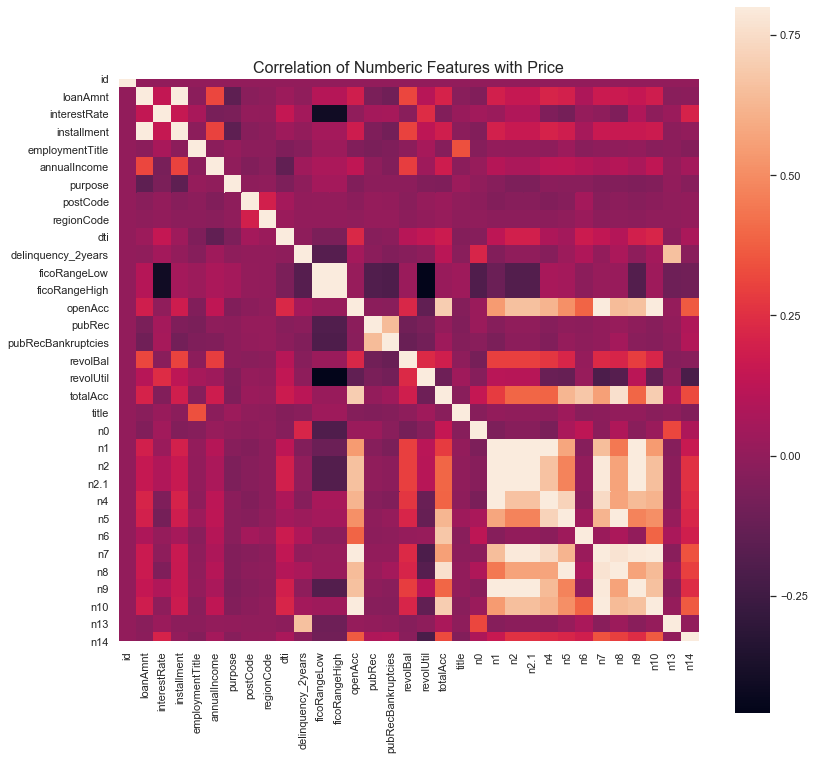

In [121]:
# 相关性分析
loan_numeric = train[numerical_serial_fea]
corr = loan_numeric.corr()
# print(corr['interestRate'].sort_values(ascending = False),'\n')

fig, ax = plt.subplots(figsize = (13, 13))
plt.title("Correlation of Numberic Features with Price", y = 1, size=16)
sns.heatmap(corr, square = True,  vmax=0.8)


In [52]:
# 查看几个特征的偏度和峰值
for col in numeric_features:
    print('{:15}'.format(col), 'Skewness: {:05.2f}'.format(train[col].skew()) ,  '   ' ,'Kurtosis: {:06.2f}'.format(train[col].kurt()))

id              Skewness: -0.00     Kurtosis: -01.20
loanAmnt        Skewness: 00.78     Kurtosis: -00.08
term            Skewness: 01.21     Kurtosis: -00.54
interestRate    Skewness: 00.71     Kurtosis: 000.50
installment     Skewness: 01.01     Kurtosis: 000.75
employmentTitle Skewness: 01.38     Kurtosis: 000.55
homeOwnership   Skewness: 00.68     Kurtosis: -00.47
annualIncome    Skewness: 46.19     Kurtosis: 4902.03
verificationStatus Skewness: -0.02     Kurtosis: -01.37
isDefault       Skewness: 01.50     Kurtosis: 000.26
purpose         Skewness: 01.25     Kurtosis: 001.25
postCode        Skewness: 00.83     Kurtosis: -00.14
regionCode      Skewness: 00.78     Kurtosis: -00.03
dti             Skewness: 27.30     Kurtosis: 2153.80
delinquency_2years Skewness: 05.69     Kurtosis: 062.27
ficoRangeLow    Skewness: 01.28     Kurtosis: 001.65
ficoRangeHigh   Skewness: 01.28     Kurtosis: 001.65
openAcc         Skewness: 01.30     Kurtosis: 003.33
pubRec          Skewness: 13.52     Ku

In [ ]:
# 匿名特征相互之间关系可视化 
sns.set()
columns = ['n0', 'n1', 'n2', 'n2.1', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14']
sns.pairplot(train[columns], size=2, kind='scatter', diag_kind='kde')
plt.show()

### 4.2 测试集上的连续型特征

In [76]:
numeric_features_test = test.select_dtypes(include=[np.number])
numeric_features_test.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment',
       'employmentTitle', 'homeOwnership', 'annualIncome',
       'verificationStatus', 'purpose', 'postCode', 'regionCode', 'dti',
       'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc',
       'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'title', 'policyCode', 'n0',
       'n1', 'n2', 'n2.1', 'n2.2', 'n2.3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9',
       'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')

In [82]:
# 查看几个特征的偏度和峰值
for col in numeric_features_test:
    print('{:15}'.format(col), 'Skewness: {:05.2f}'.format(test[col].skew()) ,  '   ' ,'Kurtosis: {:06.2f}'.format(test[col].kurt()))

id              Skewness: 00.00     Kurtosis: -01.20
loanAmnt        Skewness: 00.78     Kurtosis: -00.08
term            Skewness: 01.21     Kurtosis: -00.53
interestRate    Skewness: 00.71     Kurtosis: 000.50
installment     Skewness: 01.01     Kurtosis: 000.75
employmentTitle Skewness: 01.37     Kurtosis: 000.51
homeOwnership   Skewness: 00.67     Kurtosis: -00.50
annualIncome    Skewness: 52.04     Kurtosis: 5056.76
verificationStatus Skewness: -0.02     Kurtosis: -01.36
purpose         Skewness: 01.25     Kurtosis: 001.27
postCode        Skewness: 00.84     Kurtosis: -00.13
regionCode      Skewness: 00.78     Kurtosis: -00.04
dti             Skewness: 30.56     Kurtosis: 2362.24
delinquency_2years Skewness: 05.72     Kurtosis: 059.67
ficoRangeLow    Skewness: 01.30     Kurtosis: 001.72
ficoRangeHigh   Skewness: 01.30     Kurtosis: 001.72
openAcc         Skewness: 01.28     Kurtosis: 003.32
pubRec          Skewness: 11.59     Kurtosis: 649.05
pubRecBankruptcies Skewness: 03.62    

## 5. 类别型特征

In [94]:
# 查看训练集中特征属性只有一值的特征
one_value_fea = [col for col in train.columns if train[col].nunique() <= 1]
one_value_fea

['policyCode']

In [95]:
# 查看测试集中特征属性只有一值的特征
one_value_fea_test = [col for col in test.columns if test[col].nunique() <= 1]
one_value_fea_test

['policyCode']

In [56]:
categorical_features = train.select_dtypes(include=[np.object])
categorical_features.columns

Index(['grade', 'subGrade', 'employmentLength', 'issueDate',
       'earliesCreditLine'],
      dtype='object')

In [83]:
categorical_features_test = test.select_dtypes(include=[np.object])
categorical_features_test.columns

Index(['grade', 'subGrade', 'employmentLength', 'issueDate',
       'earliesCreditLine'],
      dtype='object')

In [84]:
# 测试集类别特征分布
for cat in categorical_features_test:
    print('\n{}特征有{}个不同的特征值：'.format(cat, test[cat].nunique()))
    print(test[cat].value_counts())


grade特征有7个不同的特征值：
B    58365
C    56701
A    34927
D    29924
E    14010
F     4698
G     1375
Name: grade, dtype: int64

subGrade特征有35个不同的特征值：
C1    12857
B4    12423
B5    12400
B3    12100
C2    11791
C4    11110
C3    11018
B2    10898
B1    10544
C5     9925
A5     9629
A4     7753
D1     7667
D2     6713
A1     6398
D3     5821
A3     5644
A2     5503
D4     5236
D5     4487
E1     3527
E2     3175
E3     2780
E4     2414
E5     2114
F1     1462
F2     1073
F3      906
F4      714
F5      543
G1      488
G2      325
G3      232
G4      166
G5      164
Name: subGrade, dtype: int64

employmentLength特征有11个不同的特征值：
10+ years    65772
2 years      18207
3 years      16011
< 1 year     15989
1 year       13182
5 years      12543
4 years      11833
6 years       9328
8 years       8976
7 years       8823
9 years       7594
Name: employmentLength, dtype: int64

issueDate特征有138个不同的特征值：
2016-03-01    7476
2015-10-01    6393
2015-07-01    6094
2015-12-01    5721
2014-10-01    5307
2016-02-0

In [85]:
# 训练集类别特征nunique分布
for cat_fea in categorical_features:
    print("\n{}特征有 {}个不同的值:".format(cat_fea, train[cat_fea].nunique()))
    print(train[cat_fea].value_counts())


grade特征有 7个不同的值:
B    233690
C    227118
A    139661
D    119453
E     55661
F     19053
G      5364
Name: grade, dtype: int64

subGrade特征有 35个不同的值:
C1    50763
B4    49516
B5    48965
B3    48600
C2    47068
C3    44751
C4    44272
B2    44227
B1    42382
C5    40264
A5    38045
A4    30928
D1    30538
D2    26528
A1    25909
D3    23410
A3    22655
A2    22124
D4    21139
D5    17838
E1    14064
E2    12746
E3    10925
E4     9273
E5     8653
F1     5925
F2     4340
F3     3577
F4     2859
F5     2352
G1     1759
G2     1231
G3      978
G4      751
G5      645
Name: subGrade, dtype: int64

employmentLength特征有 12个不同的值:
10+ years    262753
2 years       72358
< 1 year      64237
3 years       64152
1 year        52489
5 years       50102
4 years       47985
MISSING       46799
6 years       37254
8 years       36192
7 years       35407
9 years       30272
Name: employmentLength, dtype: int64

issueDate特征有 139个不同的值:
2016-03-01    29066
2015-10-01    25525
2015-07-01    24496
2015-12-01

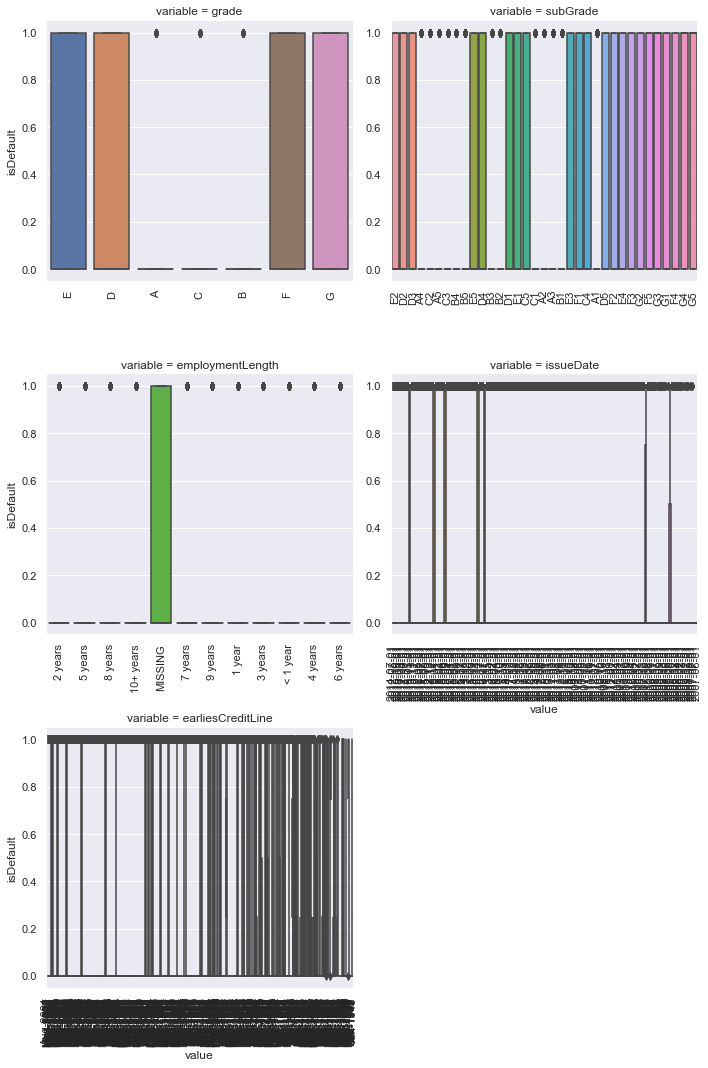

In [57]:

for c in categorical_features:
    train[c] = train[c].astype('category')
    if train[c].isnull().any():
        train[c] = train[c].cat.add_categories(['MISSING'])
        train[c] = train[c].fillna('MISSING')

# 类别特征的箱型图可视化
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(train, id_vars=['isDefault'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "isDefault")

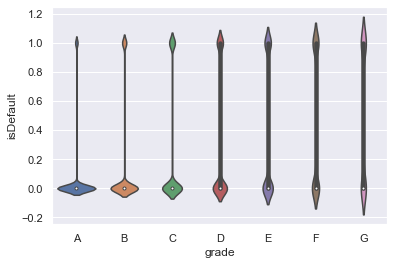

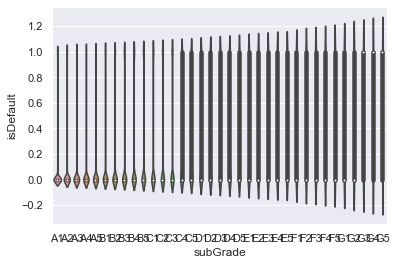

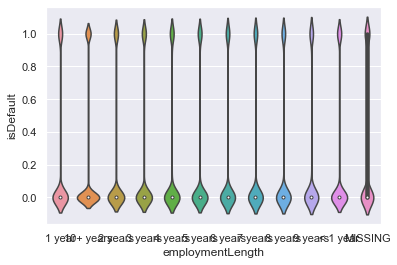

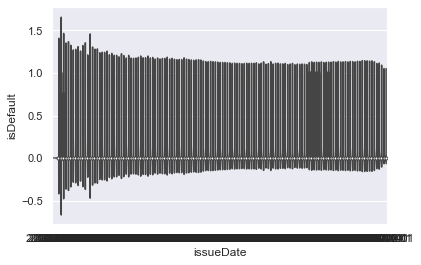

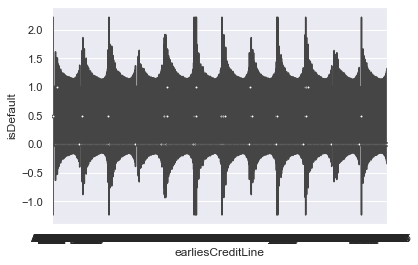

In [58]:
# 类别特征的小提琴图可视化
catg_list = categorical_features
target = 'isDefault'
for catg in catg_list :
    sns.violinplot(x=catg, y=target, data=train)
    plt.show()

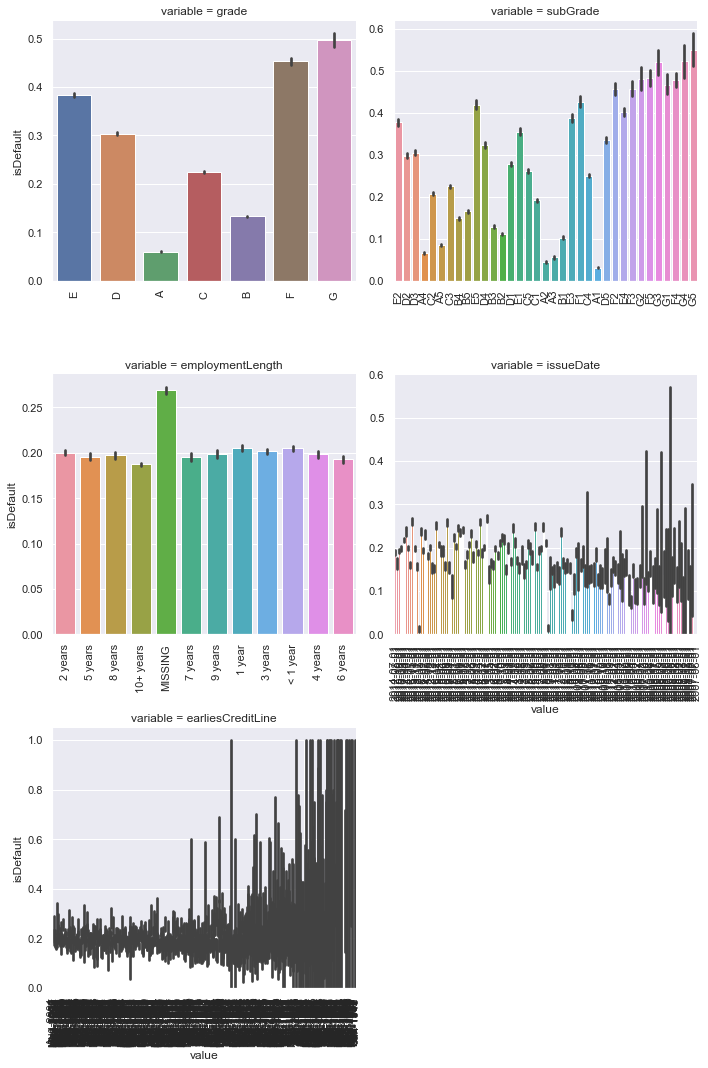

In [59]:
# 类别特征的柱形图可视化
def bar_plot(x, y, **kwargs):
    sns.barplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(train, id_vars=['isDefault'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(bar_plot, "value", "isDefault")

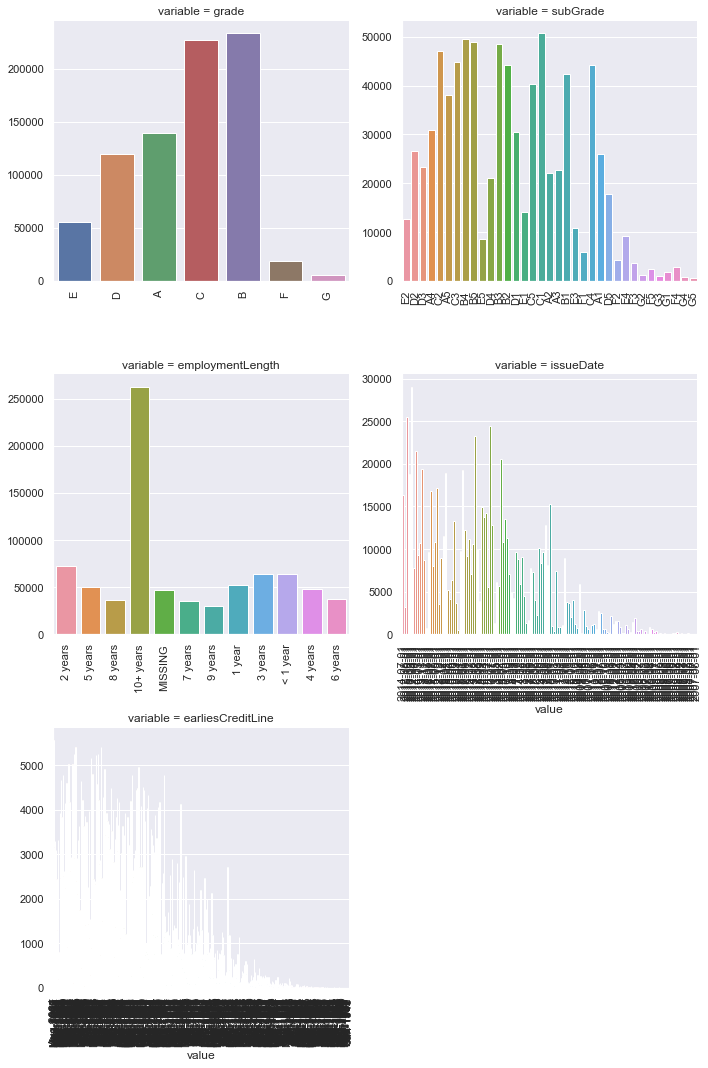

In [60]:
# 类别特征的每个类别频数可视化(count_plot)
def count_plot(x,  **kwargs):
    sns.countplot(x=x)
    x=plt.xticks(rotation=90)

f = pd.melt(train,  value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(count_plot, "value")

## 生成报告

In [ ]:
import pandas_profiling
pfr = pandas_profiling.ProfileReport(train)
pfr.to_file("./example.html")